<a href="https://colab.research.google.com/github/HariprasadG447/ML-Projects/blob/main/Prof_Sujith_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"


 011021_Hariprasad.mp4
'ACADS FUNDA.pdf'
 ae20b028-Aq1.pdf
 ae20b028-Aq2.pdf
 ae20b028-Aq3.pdf
 ae20b028-Bq1.pdf
 ae20b028-bQ2.pdf
 ae20b028-bQ3.pdf
 ae20b028-CQ1.pdf
'ae20b028-CQ2 (1).pdf'
 ae20b028-CQ2.pdf
 ae20b028-DQ1.pdf
 ae20b028-DQ2.pdf
 AE20B028_instrumentation.pdf
'Ae20b028-Part-A (1).pdf'
'Ae20b028-Part-A (2).pdf'
'Ae20b028-Part-A (3).pdf'
 Ae20b028-Part-A.pdf
 ae20b028-part-B.pdf
'Aiming companies.gsheet'
'Analytics and sustainability app'
 Aniradichita-MoU.gdoc
'Annual budget.gsheet'
'Annual financial data.gsheet'
 Applications
'App questions.gdoc'
 AS2040-ODDS22-3.gdoc
 AS2040-ODDS22-3.pdf
'A&S Apps.gsheet'
 asm_assign2.gslides
 Assignments
 Avionics.gdoc
 Batch_I
 books
'budget hele-shaw.gsheet'
'Business letter.gdoc'
 Card.gdoc
'Cd values.gdoc'
'CH_AE20B028_Hariprasad G.pdf'
 Classroom
'Colab Notebooks'
'Collimator design using parabolic mirrors.gdoc'
'Consulting proposal.gslides'
'Copy of 7 - [D].part6.rar'
'Copy of Photography Competition - Descriptions.gdoc'
'Copy of 

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle ECG data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Kaggle ECG data/ptbdb_normal.csv
/content/drive/MyDrive/Kaggle ECG data/mitbih_test.csv
/content/drive/MyDrive/Kaggle ECG data/mitbih_train.csv
/content/drive/MyDrive/Kaggle ECG data/ptbdb_abnormal.csv


In [4]:
import pandas as pd

In [5]:
mitbih_test=pd.read_csv('/content/drive/MyDrive/Kaggle ECG data/mitbih_test.csv',header=None)
mitbih_train=pd.read_csv('/content/drive/MyDrive/Kaggle ECG data/mitbih_train.csv',header=None)
print(mitbih_test.shape)
print(mitbih_train.shape)

(21892, 188)
(87554, 188)


In [6]:
from sklearn.utils import resample

print(mitbih_train.shape)
print(mitbih_test.shape)

value_counts=mitbih_train.iloc[:,mitbih_train.shape[1]-1].value_counts()
print(value_counts)

mitbih_train_0=mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==0]
print(mitbih_train_0.shape)
mitbih_train_1=mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==1]
print(mitbih_train_1.shape)
mitbih_train_2=mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==2]
mitbih_train_3=mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==3]
mitbih_train_4=mitbih_train[mitbih_train.iloc[:,mitbih_train.shape[1]-1]==4]

mitbih_train_1_upsample=resample(mitbih_train_1,replace=True,n_samples=mitbih_train_0.shape[0],random_state=123)
print(mitbih_train_1_upsample.shape)
mitbih_train_2_upsample=resample(mitbih_train_2,replace=True,n_samples=mitbih_train_0.shape[0],random_state=123)
print(mitbih_train_2_upsample.shape)
mitbih_train_3_upsample=resample(mitbih_train_3,replace=True,n_samples=mitbih_train_0.shape[0],random_state=123)
print(mitbih_train_3_upsample.shape)
mitbih_train_4_upsample=resample(mitbih_train_4,replace=True,n_samples=mitbih_train_0.shape[0],random_state=123)
print(mitbih_train_4_upsample.shape)

(87554, 188)
(21892, 188)
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
(72471, 188)
(2223, 188)
(72471, 188)
(72471, 188)
(72471, 188)
(72471, 188)


In [8]:
import numpy as np

In [9]:
mitbih_train_upsampled=np.concatenate((mitbih_train_0,mitbih_train_1_upsample,mitbih_train_2_upsample,mitbih_train_3_upsample,mitbih_train_4_upsample))
mitbih_train_upsampled.shape

mitbih_train_upsampled=pd.DataFrame(mitbih_train_upsampled)
mitbih_train_upsampled.iloc[:,mitbih_train_upsampled.shape[1]-1].value_counts()

0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: 187, dtype: int64

In [29]:
y=mitbih_train_upsampled.iloc[:,mitbih_train_upsampled.shape[1]-1]
X=mitbih_train_upsampled.iloc[:,0:(mitbih_train_upsampled.shape[1]-1)]
print(X.shape)
print(y)
print(np.unique(y))

print(X.shape,y.shape)



(362355, 187)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
362350    4.0
362351    4.0
362352    4.0
362353    4.0
362354    4.0
Name: 187, Length: 362355, dtype: float64
[0. 1. 2. 3. 4.]
(362355, 187) (362355,)


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.sum(y_train)/len(y_train))
print(np.sum(y_test)/len(y_test))

(289884, 187)
(289884,)
(72471, 187)
(72471,)
1.9994377061169295
2.002249175532282


In [31]:
y_train

180012    2.0
257469    3.0
305088    4.0
71024     0.0
68827     0.0
         ... 
119879    1.0
259178    3.0
131932    1.0
146867    2.0
121958    1.0
Name: 187, Length: 289884, dtype: float64

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc

In [33]:
knn = KNN()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
print('Accuracy KNN: %f' % (acc(y_train[40000:42000], knn.predict(x_train[40000:42000]))))

Accuracy KNN: 0.995500


In [35]:
print('Accuracy KNN: %f' % (acc(y_test, knn.predict(x_test))))

Accuracy KNN: 0.994039


In [36]:
np.round(x_train.shape[0]/5)

57977.0

In [17]:
print('Example in class 0')
print(y_test[y_test[y_test==0].index[0]])
print('Example in class 1')
print(y_test[y_test[y_test==1].index[0]])
print('Example in class 2')
print(y_test[y_test[y_test==2].index[0]])
print('Example in class 3')
print(y_test[y_test[y_test==3].index[0]])
print('Example in class 4')
print(y_test[y_test[y_test==4].index[0]])

Example in class 0
0.0
Example in class 1
1.0
Example in class 2
2.0
Example in class 3
3.0
Example in class 4
4.0


In [24]:
print(np.where(np.asarray(y_test)==0)[0][0])
print(np.where(np.asarray(y_test)==1)[0][0])
print(y_test.iloc[np.where(np.asarray(y_test)==1)[0][0]])
x_test.iloc[[np.where(np.asarray(y_test)==1)[0][0]]]

8
7
1.0


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
138724,0.778846,0.754808,0.201923,0.0,0.120192,0.177885,0.168269,0.211538,0.240385,0.1875,...,0.355769,0.365385,0.384615,0.370192,0.370192,0.384615,0.384615,0.360577,0.365385,0.384615


In [25]:
print('kNN prediction of sample in class 0')
print(knn.predict_proba(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]])))
print('kNN prediction of sample in class 1')
print(knn.predict_proba(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==1)[0][0]]])))
print('kNN prediction of sample in class 2')
print(knn.predict_proba(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==2)[0][0]]])))
print('kNN prediction of sample in class 3')
print(knn.predict_proba(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==3)[0][0]]])))
print('kNN prediction of sample in class 4')
print(knn.predict_proba(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==4)[0][0]]])))

kNN prediction of sample in class 0
[[1. 0. 0. 0. 0.]]
kNN prediction of sample in class 1
[[0. 1. 0. 0. 0.]]
kNN prediction of sample in class 2
[[0. 0. 1. 0. 0.]]
kNN prediction of sample in class 3
[[0. 0. 0. 1. 0.]]
kNN prediction of sample in class 4
[[0. 0. 0. 0. 1.]]


In [26]:
import matplotlib.pyplot as plt

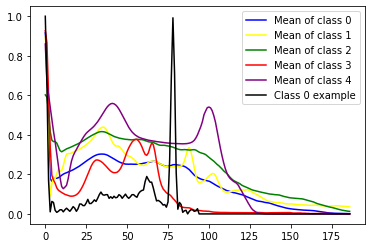

In [27]:
plt.plot(x_test[y_test == 0].mean(), color='blue',
        label='Mean of class 0')
plt.plot(x_test[y_test == 1].mean(), color='yellow',
        label='Mean of class 1')
plt.plot(x_test[y_test == 2].mean(), color='green',
        label='Mean of class 2')
plt.plot(x_test[y_test == 3].mean(), color='red',
        label='Mean of class 3')
plt.plot(x_test[y_test == 4].mean(), color='purple',
        label='Mean of class 4')
plt.plot(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,1),color='black',label='Class 0 example')
plt.legend()

In [28]:
print(np.corrcoef(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,),x_test[y_test == 0].mean())[0][1])
print(np.corrcoef(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,),x_test[y_test == 1].mean())[0][1])
print(np.corrcoef(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,),x_test[y_test == 2].mean())[0][1])
print(np.corrcoef(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,),x_test[y_test == 3].mean())[0][1])
print(np.corrcoef(np.asarray(x_test.iloc[[np.where(np.asarray(y_test)==0)[0][0]]]).reshape(187,),x_test[y_test == 4].mean())[0][1])

0.6188923980547887
0.5262740382550006
0.4458045544099792
0.5601266399048971
0.4126523911223933


Clearly highest correlation for class 0 is with class 0 elements